<a href="https://colab.research.google.com/github/hsarfraz/Tiny-Machine-Learning/blob/main/0_12_dropout_regulation_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dropout Regularization

In notebook 0.11 I talked about overfitting which is when a neural network becomes over specialised on a particular type of input data and incorrectly identify the other forms of that data.

One way to overcome ML model overfitting is to use **dropout regularisation**. As mentioned in notebook 0.03, when a neural network is being trained each individual neuron will have an effect on neurons in the subsequent/resulting layers. For example, neighboring neurons can end up with similar weights and biases, and if not monitored this can lead the overall model to become overspecialized to the features activated by those neurons. Over time, in larger networks, some neurons can become overspecialised and that feeds the resulting neurons, which can lead to overfitting.  

Dropout regularisation reduces the chances of the neurons becoming overspecialized by removing a random number of neurons and connections which temporarily blocks the contribution that a neuron can make to the next layer. This reduces the chances of the neurons becoming overspecialized. The network will still learn the same number of parameters, but it should be better at generalization—that is, it should be more resilient to different inputs. (see image below on dropout regularisation)

<img src="images/0.12_dropout_regularisation.jpg" width="700">


## Current Tensorflow Optimizers used

An optimizer adjusts the model's parameters to minimize the loss function output. Up until now I have used these optimizers:

* Stochastic gradient descent (SGD)
* RMSProp
* Adam

You can learn more about the suite of optimizers in TensorFlow at https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

## Current Tensorflow Loss Functions used

Loss Functions measure how far the model's predictions are from the true values during training. Up until now I have used these loss functions:

* Mean Squared Error
* Binary CrossEntropy
* Categorical CrossEntropy

You can learn about the loss functions in TensorFlow at https://www.tensorflow.org/api_docs/python/tf/keras/losses

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [41]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [42]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

In [43]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:00<00:00, 310MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 156MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 48.5MB/s]


In [44]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
   rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (224, 224)
CLASS_MODE = 'categorical' #2D one-hot encoded labels

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [46]:
import tensorflow as tf
model = tf.keras.models.Sequential([
   # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 26, 26, 64)       

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [47]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/20
9/9 [==============================] - 17s 1s/step - loss: 1.2531 - accuracy: 0.4120 - val_loss: 1.0583 - val_accuracy: 0.4662
Epoch 2/20
9/9 [==============================] - 6s 672ms/step - loss: 0.9552 - accuracy: 0.4961 - val_loss: 0.8924 - val_accuracy: 0.5414
Epoch 3/20
9/9 [==============================] - 7s 731ms/step - loss: 0.8722 - accuracy: 0.6219 - val_loss: 0.9032 - val_accuracy: 0.5564
Epoch 4/20
9/9 [==============================] - 7s 839ms/step - loss: 0.8674 - accuracy: 0.6112 - val_loss: 0.9335 - val_accuracy: 0.5188
Epoch 5/20
9/9 [==============================] - 6s 674ms/step - loss: 0.7411 - accuracy: 0.6896 - val_loss: 1.0074 - val_accuracy: 0.4962
Epoch 6/20
9/9 [==============================] - 8s 885ms/step - loss: 0.6975 - accuracy: 0.7050 - val_loss: 1.1145 - val_accuracy: 0.5564
Epoch 7/20
9/9 [==============================] - 6s 743ms/step - loss: 0.6869 - accuracy: 0.7079 - val_loss: 1.0594 - val_accuracy: 0.5038
Epoch 8/20
9/9 [======

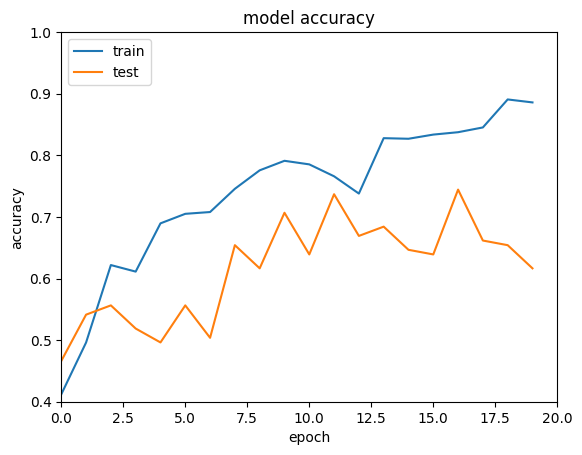

In [48]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()